In [2]:
# Import the necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
plt.style.use('seaborn')

import pandas as pd
import numpy as np

### Play-Play Network

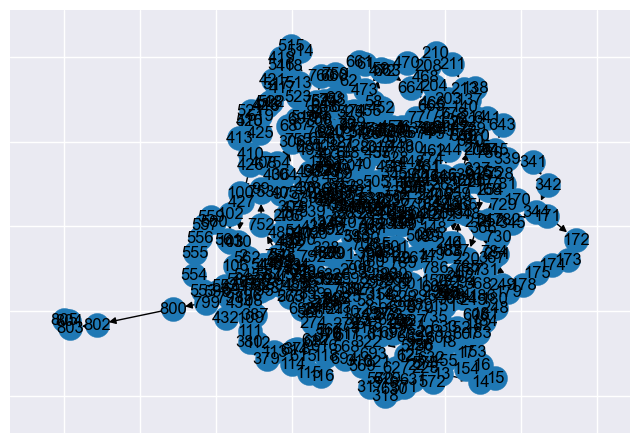

In [ ]:
from nba_api.stats.endpoints import playbyplayv2

# Call the API to get the play-by-play data
game_id = '0021900001' # Replace with the actual game ID you want to analyze
play_by_play = playbyplayv2.PlayByPlayV2(game_id=game_id)
play_by_play_df = play_by_play.get_data_frames()[0]

# Build the network
G = nx.DiGraph()

# Creating the nodes
for index, row in play_by_play_df.iterrows():
    G.add_node(row['EVENTNUM'], play_name=row['EVENTMSGTYPE'])

# Creating the edges
for index, row in play_by_play_df.iterrows():
    if index != 0:
        G.add_edge(play_by_play_df.loc[index-1, 'EVENTNUM'], row['EVENTNUM'])

# Set the positions of the nodes
pos = nx.spring_layout(G, iterations=50, scale=2)

nx.draw_networkx(G, pos)
plt.show()


This code uses the playbyplayv2 endpoint of the nba_api package to retrieve the play-by-play data for a specific game, then it creates a directed graph, where nodes are the plays and edges are the sequence of events that lead to a successful play, with the edges pointing from the event that leads to a play to the play itself.

You can also use this graph for further analysis like finding centrality measures, communities, etc.

### player-play network

In [ ]:
!pip install networkx

MovieWriter imagemagick unavailable; using Pillow instead.
c:\Users\baigs\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\drawing\nx_pylab.py:462: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


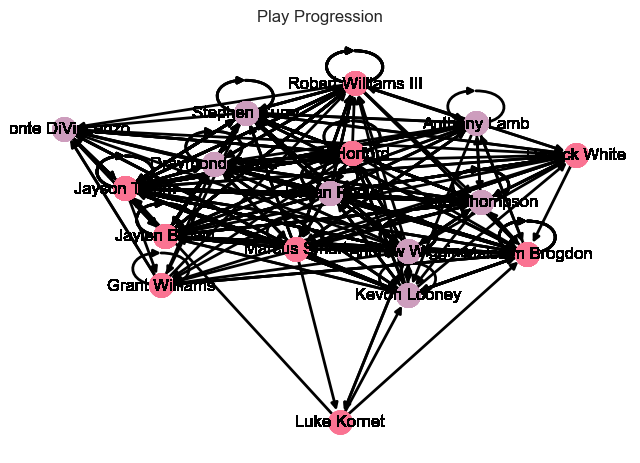

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from nba_api.stats.endpoints import playbyplayv2
# Call the API to get the play-by-play data
game_id = '0022200679' # Replace with the actual game ID you want to analyze
play_by_play = playbyplayv2.PlayByPlayV2(game_id=game_id)

# Remove rows with null values from the player-play network dataframe
play_by_play_df = play_by_play_df[play_by_play_df['PLAYER1_NAME'].notnull() & play_by_play_df['PLAYER1_TEAM_ID'].notnull()]

# Create the graph
G = nx.DiGraph()

# Define a list of players
list_of_players = list(set(play_by_play_df['PLAYER1_NAME'].values))

# Define a list of teams
list_of_teams = list(set(play_by_play_df['PLAYER1_TEAM_ID'].values))

# Create a dictionary to store the colors for each team
team_colors = {team:np.random.rand(3) for team in list_of_teams}

# Add the edges to the graph
for i, row in play_by_play_df.iterrows():
    if i > 0:
        if row["PLAYER1_NAME"] in list_of_players and row["prev_player_name"] in list_of_players:
            G.add_edge(row["prev_player_name"], row["PLAYER1_NAME"], event_type=row['EVENTMSGTYPE'])
    if row["PLAYER1_NAME"] in list_of_players:
        G.add_node(row["PLAYER1_NAME"], event_type=row['EVENTMSGTYPE'], team_id = row['PLAYER1_TEAM_ID'])

# Set the layout
pos = nx.spring_layout(G)

# Create the animation
fig = plt.figure()

def update(num):
    edges_to_draw = []
    nodes_to_draw = []
    if num > 0:
        row = play_by_play_df.iloc[num]
        if row["PLAYER1_NAME"] in list_of_players and row["prev_player_name"] in list_of_players:
            G.add_edge(row["prev_player_name"], row["PLAYER1_NAME"], event_type=row['EVENTMSGTYPE'])
            edges_to_draw.append((row["prev_player_name"], row["PLAYER1_NAME"]))
    if num < play_by_play_df.shape[0]:
        row = play_by_play_df.iloc[num]
        if row["PLAYER1_NAME"] in list_of_players:
            G.add_node(row["PLAYER1_NAME"], event_type=row['EVENTMSGTYPE'], team_id = row['PLAYER1_TEAM_ID'])
            nodes_to_draw.append(row["PLAYER1_NAME"])
    if num == 0:
        plt.clf()
    else:
        nx.draw_networkx_nodes(G, pos, nodelist=nodes_to_draw, node_color=[team_colors[nx.get_node_attributes(G, 'team_id')[node]] for node in nodes_to_draw], cmap='rainbow')
        nx.draw_networkx_edges(G, pos, edgelist=edges_to_draw, width=2)
        nx.draw_networkx_labels(G, pos, labels={node:node for node in G.nodes()})
    plt.title("Play Progression")
    plt.axis('off')

ani = FuncAnimation(fig, update, frames=range(play_by_play_df.shape[0]), repeat=False)
ani.save('../Results/Animation/animation2.gif', writer='imagemagick')

plt.show()





In [ ]:
from nba_api.stats.endpoints import playbyplayv2
game_id = '0022200679' # Replace with the actual game ID you want to analyze
play_by_play = playbyplayv2.PlayByPlayV2(game_id=game_id)
play_by_play = play_by_play.get_data_frames()


In [ ]:
play_by_play[0].columns

Index(['GAME_ID', 'EVENTNUM', 'EVENTMSGTYPE', 'EVENTMSGACTIONTYPE', 'PERIOD',
       'WCTIMESTRING', 'PCTIMESTRING', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION',
       'VISITORDESCRIPTION', 'SCORE', 'SCOREMARGIN', 'PERSON1TYPE',
       'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_NICKNAME', 'PLAYER1_TEAM_ABBREVIATION', 'PERSON2TYPE',
       'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_NICKNAME', 'PLAYER2_TEAM_ABBREVIATION', 'PERSON3TYPE',
       'PLAYER3_ID', 'PLAYER3_NAME', 'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_NICKNAME', 'PLAYER3_TEAM_ABBREVIATION',
       'VIDEO_AVAILABLE_FLAG'],
      dtype='object')

# Synergy Analysis of NBA Super Star LeBron James


In [ ]:
from random import choice
import networkx as nx
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import playbyplayv2
from nba_api.stats.endpoints import playergamelog

In [ ]:
# Get Lebron James' player ID
lebron = players.find_players_by_full_name("LeBron James")[0]
lebron_id = lebron["id"]

In [ ]:
# Get Lebron James' game logs for a given season
game_logs = playergamelog.PlayerGameLog(player_id=lebron_id).get_data_frames()
game_logs = game_logs[0]
game_ids = game_logs.Game_ID.unique()  

In [ ]:
len(game_ids)

37

In [ ]:
# Get the play-by-play data for all games Lebron James played in
plays = pd.DataFrame()
for game in game_ids:
    # try:
        play_by_play = playbyplayv2.PlayByPlayV2(game_id=game)
        play = play_by_play.get_data_frames()[0]
        plays = plays.append(play)
        print(f"Shape : {plays.shape}")

    # except:
    #     print(f"Failed for {game}")

plays.head()

In [ ]:
plays[(plays['PLAYER1_ID']==lebron_id)&(plays['EVENTMSGTYPE']==1)]

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
2,0022200705,7,1,108,1,9:15 PM,11:47,None,None,James 1' Cutting Dunk Shot (2 PTS) (Schroder 1...,...,Lakers,LAL,0,0,None,NaN,None,None,None,1
10,0022200705,18,1,103,1,9:16 PM,10:27,None,None,James 29' 3PT Running Pull-Up Jump Shot (5 PTS),...,None,None,0,0,None,NaN,None,None,None,1
13,0022200705,21,1,103,1,9:16 PM,9:58,None,None,James 30' 3PT Running Pull-Up Jump Shot (8 PTS),...,None,None,0,0,None,NaN,None,None,None,1
33,0022200705,48,1,63,1,9:23 PM,7:15,None,None,James 17' Fadeaway Jumper (10 PTS),...,None,None,0,0,None,NaN,None,None,None,1
89,0022200705,131,1,83,1,9:37 PM,0:40,None,None,James 14' Fadeaway Bank Shot (12 PTS),...,None,None,0,0,None,NaN,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0022200095,390,1,6,3,10:57 PM,11:01,James 1' Driving Layup (13 PTS),None,None,...,None,None,0,0,None,NaN,None,None,None,1
268,0022200095,396,1,6,3,10:58 PM,10:00,James 2' Driving Layup (15 PTS),None,None,...,None,None,0,0,None,NaN,None,None,None,1
285,0022200095,421,1,1,3,11:01 PM,8:24,James 16' Jump Shot (18 PTS),None,None,...,None,None,0,0,None,NaN,None,None,None,1
394,0022200095,574,1,79,4,11:30 PM,8:22,James 26' 3PT Pullup Jump Shot (22 PTS),None,None,...,None,None,0,0,None,NaN,None,None,None,1


In [ ]:
# Create the graph
G = nx.DiGraph()

In [ ]:
# Create a dictionary to store the number of passes between Lebron and each teammate
synergy_metrics = {}

# Iterate through the play-by-play data
for i, play in plays.iterrows():
    event_msg_type = play['EVENTMSGTYPE']
    if event_msg_type == 1: # field goal made
        if play['PLAYER1_ID'] == lebron_id: # check if Lebron was the shooter
            shooter_name = play['PLAYER1_NAME']
            shooter_team_id = play['PLAYER1_TEAM_ID']
            if play['PLAYER2_NAME'] != None: # check if Lebron had an assist
                assist_name = play['PLAYER2_NAME']
                assist_team_id = play['PLAYER2_TEAM_ID']
                if shooter_team_id == assist_team_id: # check if shooter and assist were on the same team
                    if assist_name not in synergy_metrics:
                        synergy_metrics[assist_name] = 1
                    else:
                        synergy_metrics[assist_name] += 1
                        

In [ ]:
synergy_metrics

{'Dennis Schroder': 30,
 'Patrick Beverley': 11,
 'Russell Westbrook': 55,
 'Thomas Bryant': 11,
 'Troy Brown Jr.': 5,
 'Kendrick Nunn': 2,
 'Juan Toscano-Anderson': 2,
 'Wenyen Gabriel': 4,
 'Austin Reaves': 18,
 'Lonnie Walker IV': 6,
 'Anthony Davis': 22,
 'Matt Ryan': 1}

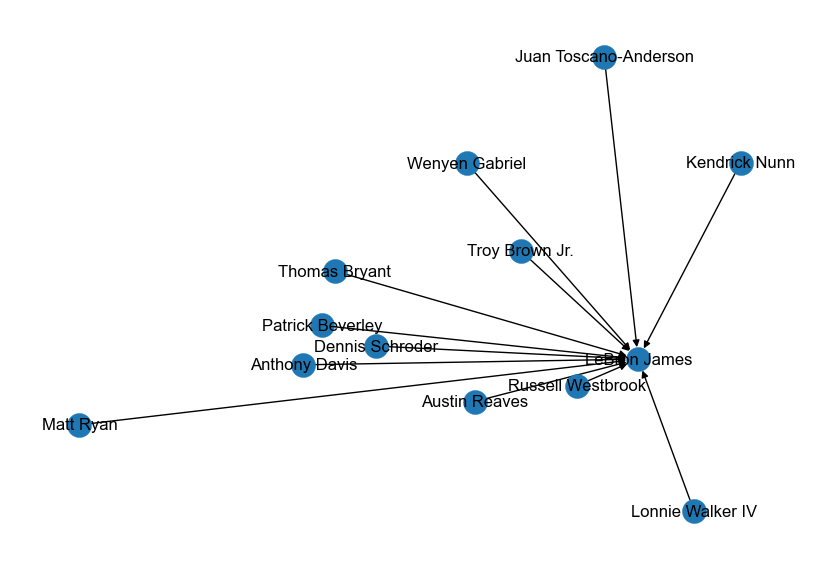

In [ ]:
# Add nodes and edges to the graph
for teammate, passes in synergy_metrics.items():
    G.add_node(teammate)
    G.add_edge(teammate,shooter_name, weight=passes)
    
# Draw the graph
nx.draw(G, with_labels=True)


In [ ]:
# Save the team affiliation network to csv
nx.write_weighted_edgelist(G, 'lebron_synergy_edgelist.csv', delimiter=',', encoding='utf-8')

# Synergy Curry

In [13]:
#!pip install nba_api

In [4]:
from random import choice
import networkx as nx
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import playbyplayv2
from nba_api.stats.endpoints import playergamelog

In [5]:
# Get Lebron James' player ID
Curry = players.find_players_by_full_name("Stephen Curry")[0]
Curry_id = Curry["id"]

In [6]:
# Get Lebron James' game logs for a given season
game_logs = playergamelog.PlayerGameLog(player_id=Curry_id).get_data_frames()
game_logs = game_logs[0]
game_ids = game_logs.Game_ID.unique()  

In [7]:
# Get the play-by-play data for all games Lebron James played in
plays = pd.DataFrame()
for game in game_ids:
    # try:
        play_by_play = playbyplayv2.PlayByPlayV2(game_id=game)
        play = play_by_play.get_data_frames()[0]
        plays = plays.append(play)
        print(f"Shape : {plays.shape}")

    # except:
    #     print(f"Failed for {game}")

plays.head()

Shape : (485, 34)
Shape : (1034, 34)
Shape : (1485, 34)
Shape : (1960, 34)
Shape : (2462, 34)
Shape : (2987, 34)
Shape : (3468, 34)
Shape : (3961, 34)
Shape : (4425, 34)
Shape : (4892, 34)
Shape : (5338, 34)
Shape : (5832, 34)
Shape : (6328, 34)
Shape : (6803, 34)
Shape : (7255, 34)
Shape : (7726, 34)
Shape : (8179, 34)
Shape : (8681, 34)
Shape : (9151, 34)
Shape : (9627, 34)
Shape : (10092, 34)
Shape : (10574, 34)
Shape : (11065, 34)
Shape : (11570, 34)
Shape : (12028, 34)
Shape : (12523, 34)
Shape : (13046, 34)
Shape : (13490, 34)
Shape : (13995, 34)
Shape : (14511, 34)
Shape : (14989, 34)
Shape : (15515, 34)


,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,0022200704,2,12,0,1,8:42 PM,12:00,None,Start of 1st Period (8:42 PM EST),None,...,None,None,0,0,None,NaN,None,None,None,0
1,0022200704,4,10,0,1,8:42 PM,12:00,Jump Ball D. Green vs. Claxton: Tip to Irving,None,None,...,Nets,BKN,5,202681,Kyrie Irving,1.610613e+09,Brooklyn,Nets,BKN,1
2,0022200704,7,1,108,1,8:42 PM,11:37,None,None,Claxton 5' Cutting Dunk Shot (2 PTS) (Irving 1...,...,Nets,BKN,0,0,None,NaN,None,None,None,1
3,0022200704,9,2,79,1,8:42 PM,11:21,MISS Poole 18' Pullup Jump Shot,None,None,...,None,None,0,0,None,NaN,None,None,None,1
4,0022200704,10,4,0,1,8:42 PM,11:19,None,None,Claxton REBOUND (Off:0 Def:1),...,None,None,0,0,None,NaN,None,None,None,1


In [8]:
# Create the graph
G = nx.DiGraph()

In [10]:
# Create a dictionary to store the number of passes between Lebron and each teammate
synergy_metrics = {}

# Iterate through the play-by-play data
for i, play in plays.iterrows():
    event_msg_type = play['EVENTMSGTYPE']
    if event_msg_type == 1: # field goal made
        if play['PLAYER1_ID'] == Curry_id: # check if Lebron was the shooter
            shooter_name = play['PLAYER1_NAME']
            shooter_team_id = play['PLAYER1_TEAM_ID']
            if play['PLAYER2_NAME'] != None: # check if Lebron had an assist
                assist_name = play['PLAYER2_NAME']
                assist_team_id = play['PLAYER2_TEAM_ID']
                if shooter_team_id == assist_team_id: # check if shooter and assist were on the same team
                    if assist_name not in synergy_metrics:
                        synergy_metrics[assist_name] = 1
                    else:
                        synergy_metrics[assist_name] += 1
                        

In [11]:
synergy_metrics

{'Draymond Green': 64,
 'Anthony Lamb': 10,
 'Jordan Poole': 20,
 'Ty Jerome': 2,
 'Klay Thompson': 9,
 'Andrew Wiggins': 12,
 'Andre Iguodala': 2,
 'Kevon Looney': 15,
 'Jonathan Kuminga': 2,
 'JaMychal Green': 2,
 'Donte DiVincenzo': 6,
 'James Wiseman': 1}

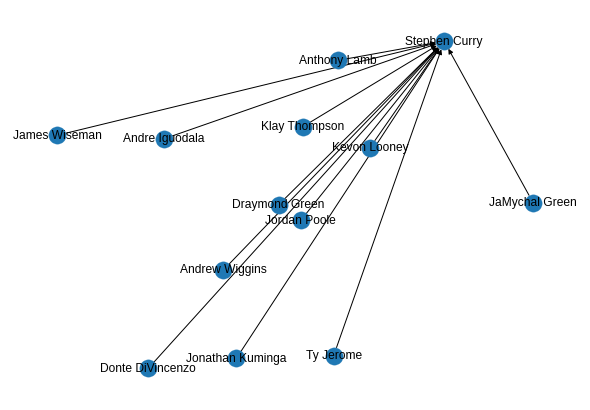

In [12]:
# Add nodes and edges to the graph
for teammate, passes in synergy_metrics.items():
    G.add_node(teammate)
    G.add_edge(teammate,shooter_name, weight=passes)
    
# Draw the graph
nx.draw(G, with_labels=True)


In [ ]:
# Save the team affiliation network to csv
nx.write_weighted_edgelist(G, 'lebron_synergy_edgelist.csv', delimiter=',', encoding='utf-8')

# Tatum

In [15]:
# Get Lebron James' player ID
Tatum = players.find_players_by_full_name("Jayson Tatum")[0]
Tatum_id = Tatum["id"]

In [16]:
# Get Lebron James' game logs for a given season
game_logs = playergamelog.PlayerGameLog(player_id=Tatum_id).get_data_frames()
game_logs = game_logs[0]
game_ids = game_logs.Game_ID.unique()  

In [17]:
# Get the play-by-play data for all games Lebron James played in
plays = pd.DataFrame()
for game in game_ids:
    # try:
        play_by_play = playbyplayv2.PlayByPlayV2(game_id=game)
        play = play_by_play.get_data_frames()[0]
        plays = plays.append(play)
        print(f"Shape : {plays.shape}")

    # except:
    #     print(f"Failed for {game}")

plays.head()

Shape : (429, 34)
Shape : (978, 34)
Shape : (1428, 34)
Shape : (1865, 34)
Shape : (2295, 34)
Shape : (2724, 34)
Shape : (3143, 34)
Shape : (3620, 34)
Shape : (4084, 34)
Shape : (4555, 34)
Shape : (4988, 34)
Shape : (5439, 34)
Shape : (5899, 34)
Shape : (6342, 34)
Shape : (6813, 34)
Shape : (7298, 34)
Shape : (7790, 34)
Shape : (8282, 34)
Shape : (8743, 34)
Shape : (9207, 34)
Shape : (9670, 34)
Shape : (10125, 34)
Shape : (10578, 34)
Shape : (11087, 34)
Shape : (11508, 34)
Shape : (11919, 34)
Shape : (12398, 34)
Shape : (12822, 34)
Shape : (13271, 34)
Shape : (13682, 34)
Shape : (14119, 34)
Shape : (14629, 34)
Shape : (15092, 34)
Shape : (15537, 34)
Shape : (16016, 34)
Shape : (16473, 34)
Shape : (16887, 34)
Shape : (17369, 34)
Shape : (17885, 34)
Shape : (18332, 34)
Shape : (18837, 34)
Shape : (19323, 34)
Shape : (19799, 34)
Shape : (20226, 34)
Shape : (20672, 34)


,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,0022200707,2,12,0,1,7:11 PM,12:00,None,Start of 1st Period (7:11 PM EST),None,...,None,None,0,0,None,NaN,None,None,None,1
1,0022200707,29,10,0,1,7:11 PM,12:00,Jump Ball Carter Jr. vs. Horford: Tip to Fultz,None,None,...,Celtics,BOS,4,1628365,Markelle Fultz,1.610613e+09,Orlando,Magic,ORL,1
2,0022200707,4,5,40,1,7:11 PM,11:44,Banchero Out of Bounds Lost Ball Turnover (P1.T1),None,None,...,None,None,1,0,None,NaN,None,None,None,1
3,0022200707,5,2,1,1,7:12 PM,11:17,None,None,MISS Horford 16' Jump Shot,...,None,None,0,0,None,NaN,None,None,None,1
4,0022200707,6,4,0,1,7:12 PM,11:14,Carter Jr. REBOUND (Off:0 Def:1),None,None,...,None,None,0,0,None,NaN,None,None,None,1


In [18]:
# Create the graph
G = nx.DiGraph()

In [19]:
# Create a dictionary to store the number of passes between Lebron and each teammate
synergy_metrics = {}

# Iterate through the play-by-play data
for i, play in plays.iterrows():
    event_msg_type = play['EVENTMSGTYPE']
    if event_msg_type == 1: # field goal made
        if play['PLAYER1_ID'] == Tatum_id: # check if Lebron was the shooter
            shooter_name = play['PLAYER1_NAME']
            shooter_team_id = play['PLAYER1_TEAM_ID']
            if play['PLAYER2_NAME'] != None: # check if Lebron had an assist
                assist_name = play['PLAYER2_NAME']
                assist_team_id = play['PLAYER2_TEAM_ID']
                if shooter_team_id == assist_team_id: # check if shooter and assist were on the same team
                    if assist_name not in synergy_metrics:
                        synergy_metrics[assist_name] = 1
                    else:
                        synergy_metrics[assist_name] += 1
                        

In [20]:
synergy_metrics

{'Grant Williams': 22,
 'Al Horford': 25,
 'Payton Pritchard': 4,
 'Derrick White': 47,
 'Malcolm Brogdon': 29,
 'Marcus Smart': 88,
 'Robert Williams III': 10,
 'Jaylen Brown': 31,
 'Luke Kornet': 7,
 'Blake Griffin': 5,
 'Sam Hauser': 2}

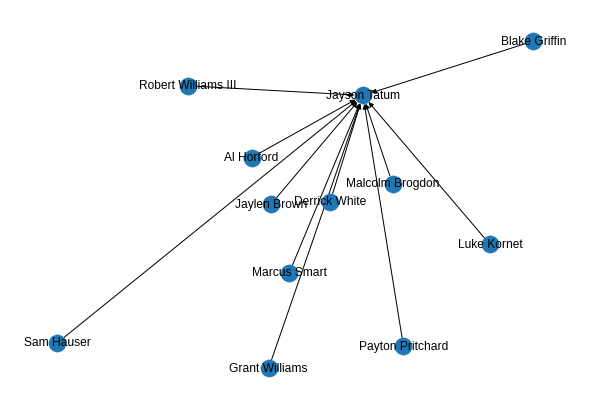

In [21]:
# Add nodes and edges to the graph
for teammate, passes in synergy_metrics.items():
    G.add_node(teammate)
    G.add_edge(teammate,shooter_name, weight=passes)
    
# Draw the graph
nx.draw(G, with_labels=True)